In [370]:
import pandas as pd
import numpy as np
import ROOT

# Counter Part

In [371]:
calibration = pd.read_excel("../data/Exp5_Poisson.xlsx", sheet_name="calibration")
ces_440v_10s = pd.read_excel("../data/Exp5_Poisson.xlsx", sheet_name="10s_440v_ces", header=None)
ces_440v_1s = pd.read_excel("../data/Exp5_Poisson.xlsx", sheet_name="1s_440v_ces", header=None)
bar_440v_10s = pd.read_excel("../data/Exp5_Poisson.xlsx", sheet_name="10s_440v_bar", header=None)
bar_440v_1s = pd.read_excel("../data/Exp5_Poisson.xlsx", sheet_name="1s_440v_bar", header=None)

In [372]:
ces_440v_10s = ces_440v_10s.rename(columns={0: "Count"})
ces_440v_1s = ces_440v_1s.rename(columns={0: "Count"})
bar_440v_10s = bar_440v_10s.rename(columns={0: "Count"})
bar_440v_1s = bar_440v_1s.rename(columns={0: "Count"})

In [374]:
#dataframe and dict to collect parameters
mu_sigma = {}
params = pd.DataFrame(columns=["A","mu", "sigma"])

 FCN=1.38805 FROM MIGRAD    STATUS=CONVERGED     220 CALLS         221 TOTAL
                     EDM=1.8283e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.39432e+02   1.10434e+00   8.32494e-04  -5.46386e-04
   2  p1           9.97444e+02   1.00445e+02   7.57791e-02   4.23416e-07
 FCN=0.917705 FROM MIGRAD    STATUS=CONVERGED      99 CALLS         100 TOTAL
                     EDM=3.87916e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.54014e+01   4.46590e+00   2.40476e-03   5.45804e-06
   2  p1           1.39423e+02   1.13793e+00   7.69266e-04   5.54098e-05
   3  p2           1.12841e+01   8.67184e-01   4.66869e-04   8.31906e-05


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


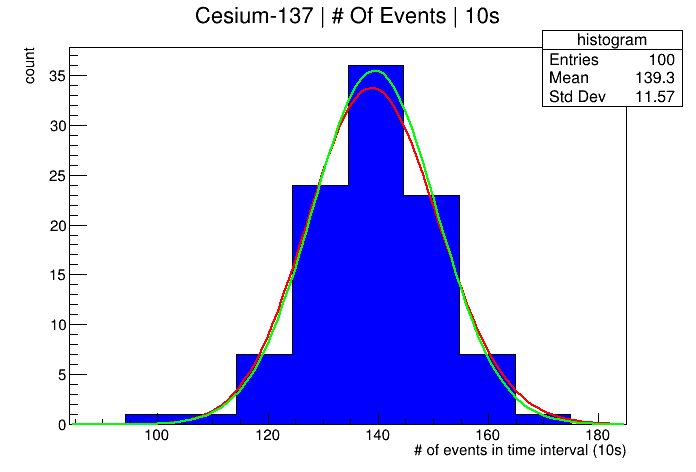

In [375]:
data = ces_440v_10s["Count"].values
mu_sigma.update({"ces_440v_10s": (np.mean(data), np.std(data))})

# Define the Poisson distribution function
poisson = ROOT.TF1("poisson", "[1]*TMath::Poisson(x,[0])", 0,10**6)

poisson.SetParameters(40, 140)

gaussian = ROOT.TF1("gaussian", "[0]*TMath::Gaus(x,[1],[2])", 0,10**6)
gaussian.SetParameters(40,140,5)

# Create a ROOT canvas and histogram object
canvas = ROOT.TCanvas("canvas", "canvas")
histogram = ROOT.TH1F("histogram", "Cesium-137 | # Of Events | 10s", 10,min(data)-20,max(data)+20)

# Fill the histogram with the data
for x in data:
    histogram.Fill(x)

# Set the histogram style
histogram.SetFillColor(ROOT.kBlue)
histogram.SetLineColor(ROOT.kBlack)

histogram.GetYaxis().SetTitle("count")
histogram.GetXaxis().SetTitle("# of events in time interval (10s)")

# Fit the histogram with the Poisson distribution
histogram.Fit(poisson)
histogram.Fit(gaussian)
gaussian.SetLineColor(ROOT.kGreen)
#fill parameter df
params.loc["ces_440v_10s_Gauss"] = [gaussian.GetParameter(0),gaussian.GetParameter(1),gaussian.GetParameter(2)]
params.loc["ces_440v_10s_Poisson"] = [poisson.GetParameter(1),poisson.GetParameter(0),np.nan]

# Draw the histogram and Poisson function on the canvas and display it
histogram.Draw()
poisson.Draw("same")
gaussian.Draw("same")
canvas.Draw()

In [376]:
print("Poisson:",poisson.GetChisquare()/poisson.GetNDF())
print("Gaussian:",gaussian.GetChisquare()/gaussian.GetNDF())

Poisson: 0.23134179093341192
Gaussian: 0.18354096376346177


 FCN=1.62854 FROM MIGRAD    STATUS=CONVERGED      55 CALLS          56 TOTAL
                     EDM=7.99084e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.32790e+01   3.87221e-01   3.06383e-04   5.94311e-04
   2  p1           3.08409e+02   3.09390e+01   2.44920e-02  -1.05420e-05
 FCN=1.88381 FROM MIGRAD    STATUS=CONVERGED     148 CALLS         149 TOTAL
                     EDM=5.32032e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.29437e+01   4.38162e+00   2.74336e-03  -2.63880e-05
   2  p1           1.31531e+01   3.86557e-01   3.19699e-04   2.93918e-05
   3  p2          -3.74494e+00   3.42308e-01   2.14253e-04   3.79580e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


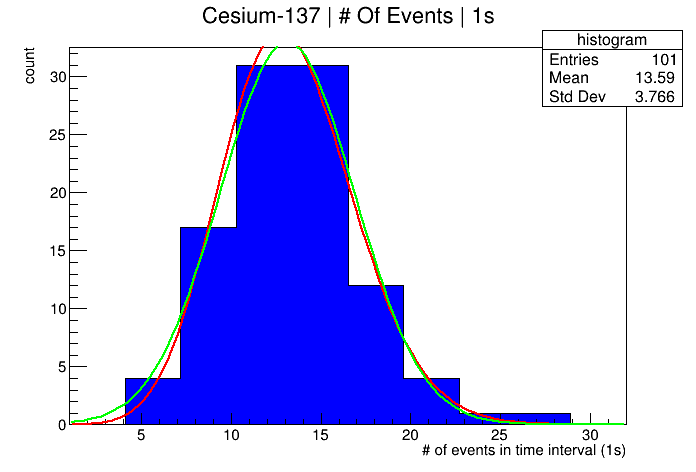

In [377]:
data = ces_440v_1s["Count"].values
mu_sigma.update({"ces_440v_1s": (np.mean(data), np.std(data))})

# Define the Poisson distribution function
poisson = ROOT.TF1("poisson", "[1]*TMath::Poisson(x,[0])", 0,10**6)

poisson.SetParameters(30, 10)

# Create a ROOT canvas and histogram object
canvas = ROOT.TCanvas("canvas", "canvas")
histogram = ROOT.TH1F("histogram", "Cesium-137 | # Of Events | 1s", 10,min(data)-5,max(data)+5)

gaussian = ROOT.TF1("gaussian", "[0]*TMath::Gaus(x,[1],[2])", 0,10**6)
gaussian.SetParameters(1,np.mean(data),np.std(data))

# Fill the histogram with the data
for x in data:
    histogram.Fill(x)

# Set the histogram style
histogram.SetFillColor(ROOT.kBlue)
histogram.SetLineColor(ROOT.kBlack)
gaussian.SetLineColor(ROOT.kGreen)

# Fit the histogram with the Poisson distribution
histogram.Fit(poisson)
histogram.Fit(gaussian)

#set axis labels
histogram.GetYaxis().SetTitle("count")
histogram.GetXaxis().SetTitle("# of events in time interval (1s)")

#fill parameter df
params.loc["ces_440v_1s_Gauss"] = [gaussian.GetParameter(0),gaussian.GetParameter(1),gaussian.GetParameter(2)]
params.loc["ces_440v_1s_Poisson"] = [poisson.GetParameter(1),poisson.GetParameter(0),np.nan]

# Draw the histogram and Poisson function on the canvas and display it
histogram.Draw()
poisson.Draw("same")
gaussian.Draw("same")
canvas.Draw()

In [378]:
print("Poisson:",poisson.GetChisquare()/poisson.GetNDF())
print("Gaussian:",gaussian.GetChisquare()/gaussian.GetNDF())

Poisson: 0.27142345357304304
Gaussian: 0.3767612919967065


 FCN=5.1016 FROM MIGRAD    STATUS=CONVERGED     161 CALLS         162 TOTAL
                     EDM=6.83304e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.29176e+01   4.37451e-01   5.27778e-04  -2.08573e-05
   2  p1           4.46979e+02   4.58842e+01   5.53399e-02  -7.79849e-07
 FCN=4.40043 FROM MIGRAD    STATUS=CONVERGED     184 CALLS         185 TOTAL
                     EDM=9.99319e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.29039e+01   5.55653e+00   4.97702e-03  -3.10195e-04
   2  p1           2.26679e+01   4.44307e-01   4.86628e-04   8.84907e-04
   3  p2           4.17981e+00   3.34130e-01   2.92743e-04  -3.43643e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


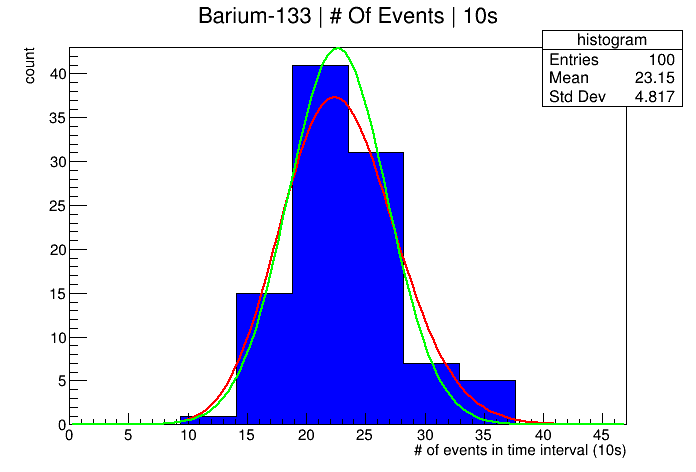

In [379]:
data = bar_440v_10s["Count"].values
mu_sigma.update({"bar_440v_10s": (np.mean(data), np.std(data))})

# Define the Poisson distribution function
poisson = ROOT.TF1("poisson", "[1]*TMath::Poisson(x,[0])",0,10**6)

poisson.SetParameter(0, 35)

# Create a ROOT canvas and histogram object
canvas = ROOT.TCanvas("canvas", "canvas")
histogram = ROOT.TH1F("histogram", "Barium-133 | # Of Events | 10s", 10, 0,max(data)+10)

# Fill the histogram with the data
for x in data:
    histogram.Fill(x)

# Set the histogram style
histogram.SetFillColor(ROOT.kBlue)
histogram.SetLineColor(ROOT.kBlack)

# Fit the histogram with the Poisson distribution
histogram.Fit(poisson)

gaussian = ROOT.TF1("gaussian", "[0]*TMath::Gaus(x,[1],[2])", 0,10**6)
gaussian.SetParameters(1,np.mean(data),np.std(data))
gaussian.SetLineColor(ROOT.kGreen)
histogram.Fit(gaussian)

histogram.GetYaxis().SetTitle("count")
histogram.GetXaxis().SetTitle("# of events in time interval (10s)")

#fill parameter df
params.loc["bar_440v_10s_Gauss"] = [gaussian.GetParameter(0),gaussian.GetParameter(1),gaussian.GetParameter(2)]
params.loc["bar_440v_10s_Poisson"] = [poisson.GetParameter(1),poisson.GetParameter(0),np.nan]

# Draw the histogram and Poisson function on the canvas and display it
histogram.Draw()
poisson.Draw("same")
gaussian.Draw("same")
canvas.Draw()

In [380]:
print("Poisson:",poisson.GetChisquare()/poisson.GetNDF())
print("Gaussian:",gaussian.GetChisquare()/gaussian.GetNDF())

Poisson: 1.275400766137964
Gaussian: 1.4668111828266925


 FCN=5.05783 FROM MIGRAD    STATUS=CONVERGED     878 CALLS         879 TOTAL
                     EDM=8.86405e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.28556e+00   1.41036e-01   1.69307e-04   2.49026e-05
   2  p1           8.87762e+01   9.11910e+00   1.09494e-02  -2.38964e-07
 FCN=4.37547 FROM MIGRAD    STATUS=CONVERGED     117 CALLS         118 TOTAL
                     EDM=3.90933e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.56663e+01   3.76270e+00   2.97110e-03   7.64206e-07
   2  p1           2.11627e+00   1.73902e-01   1.87641e-04   8.40520e-05
   3  p2           1.43345e+00   1.98157e-01   1.51521e-04   1.51952e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


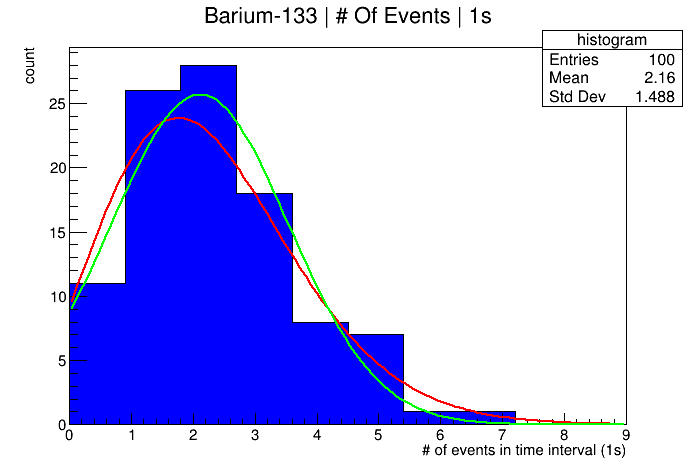

In [381]:
data = bar_440v_1s["Count"].values
mu_sigma.update({"bar_440v_1s": (np.mean(data), np.std(data))})

# Define the Poisson distribution function
poisson = ROOT.TF1("poisson", "[1]*TMath::Poisson(x,[0])",0,10**6)

poisson.SetParameter(0,35)

# Create a ROOT canvas and histogram object
canvas = ROOT.TCanvas("canvas", "canvas")
histogram = ROOT.TH1F("histogram", "Barium-133 | # Of Events | 1s", 10, 0,max(data)+2)

# Fill the histogram with the data
for x in data:
    histogram.Fill(x)

# Set the histogram style
histogram.SetFillColor(ROOT.kBlue)
histogram.SetLineColor(ROOT.kBlack)

# Fit the histogram with the Poisson distribution
histogram.Fit(poisson)

parameters = poisson.GetParameters()
errors = poisson.GetParErrors()

gaussian = ROOT.TF1("gaussian", "[0]*TMath::Gaus(x,[1],[2])", 0,10**6)
gaussian.SetParameters(1,np.mean(data),np.std(data))
gaussian.SetLineColor(ROOT.kGreen)
histogram.Fit(gaussian)

histogram.GetYaxis().SetTitle("count")
histogram.GetXaxis().SetTitle("# of events in time interval (1s)")

#fill parameter df
params.loc["bar_440v_1s_Gauss"] = [gaussian.GetParameter(0),gaussian.GetParameter(1),gaussian.GetParameter(2)]
params.loc["bar_440v_1s_Poisson"] = [poisson.GetParameter(1),poisson.GetParameter(0),np.nan]

# Get the chi-squared value
chi2 = poisson.GetChisquare()

# Draw the histogram and Poisson function on the canvas and display it
histogram.Draw()
poisson.Draw("same")
gaussian.Draw("same")
canvas.Draw()


In [382]:
print("Poisson:",poisson.GetChisquare()/poisson.GetNDF())
print("Gaussian:",gaussian.GetChisquare()/gaussian.GetNDF())

Poisson: 0.8429721229289994
Gaussian: 0.875094315785996


# Operating Voltage

In [275]:
# plot the calibration data in root

In [276]:
calibration["err_v"] = [10 for i in range(len(calibration))]
calibration["err_count"] = [0 for i in range(len(calibration))]

In [277]:
#plot V vs counts in root for calibration df

In [278]:
import ROOT as r

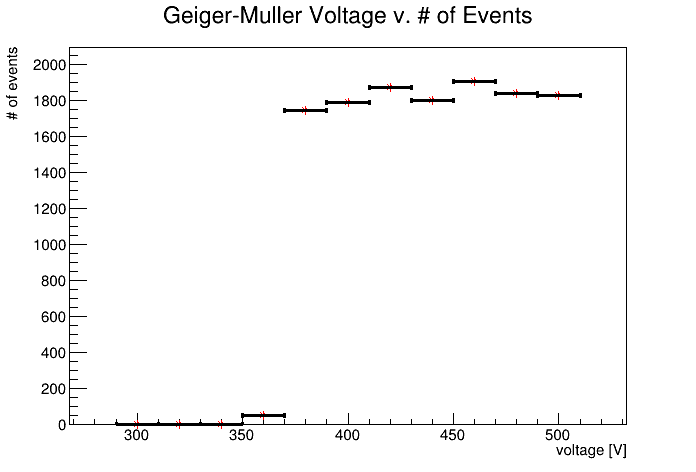

In [279]:
c= r.TCanvas()
gr = r.TGraphErrors(len(calibration), calibration["V"].values/1,calibration["count"].values/1,calibration["err_v"].values/1,calibration["err_count"].values/1)
gr.SetTitle("Geiger-Muller Voltage v. # of Events")
gr.GetXaxis().SetTitle("voltage [V]")
gr.GetYaxis().SetTitle("# of events")

#Set point size
gr.SetLineWidth(3)
#Set point color
gr.SetMarkerColor(r.kRed)

#fit a sigmoid to the data


gr.Draw("AP*")
c.Draw()

# Ruler Part

In [383]:
df = pd.read_excel("../data/poisson_fax.xlsx",usecols=["peak_diff"])

In [384]:
df["peak_diff"] = df["peak_diff"]*10

In [385]:
alpha = (len(df)+1)/1226.4

In [386]:
alpha

0.12557077625570776

 FCN=37.5295 FROM MIGRAD    STATUS=CONVERGED      98 CALLS          99 TOTAL
                     EDM=5.68609e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.89360e+01   6.01009e+00   1.37993e-02   5.48107e-06
   2  p1           1.13990e-01   9.93643e-03   2.27500e-05   8.27069e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


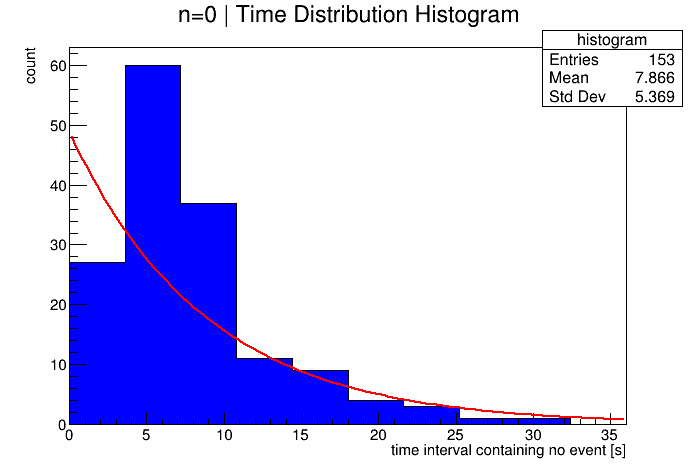

In [387]:
data = df.peak_diff.values

# Define the Poisson distribution function
poisson = ROOT.TF1("poisson", "[0]*exp(-[1]*x)", 0,10**6)

poisson.SetParameters(10, 1)

# Create a ROOT canvas and histogram object
canvas = ROOT.TCanvas("canvas", "canvas")
histogram = ROOT.TH1F("histogram", "n=0 | Time Distribution Histogram", 10,0,max(data)+5)

# Fill the histogram with the data
for x in data:
    histogram.Fill(x)

# Set the histogram style
histogram.SetFillColor(ROOT.kBlue)
histogram.SetLineColor(ROOT.kBlack)

histogram.GetYaxis().SetTitle("count")
histogram.GetXaxis().SetTitle("time interval containing no event [s]")

# Fit the histogram with the Poisson distribution
histogram.Fit(poisson)

# Draw the histogram and Poisson function on the canvas and display it
histogram.Draw()
poisson.Draw("same")
canvas.Draw()

In [388]:
print("Poisson:", poisson.GetChisquare() / poisson.GetNDF())

Poisson: 5.361361837152025


In [389]:
np.abs(alpha - poisson.GetParameter(1))/poisson.GetParError(1)

1.1655295977913034

In [390]:
data = df.peak_diff.rolling(2).sum().values

In [392]:
#first obs is nan in rolling sum
data = data[1:]

 FCN=62.8644 FROM MIGRAD    STATUS=CONVERGED     178 CALLS         179 TOTAL
                     EDM=4.21306e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.80452e+01   5.60958e+00   1.99811e-02   5.24842e-05
   2  p1           1.03719e-01   5.91384e-03   2.10720e-05  -3.90019e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).


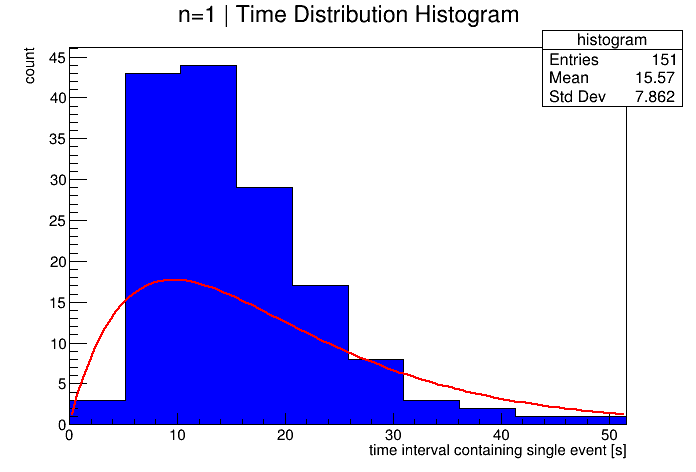

In [396]:
# Define the Poisson distribution function
poisson = ROOT.TF1("poisson", "[0]*exp(-[1]*x)*[1]*x", 0,10**6)

poisson.SetParameters(10, 1)

# Create a ROOT canvas and histogram object
canvas = ROOT.TCanvas("canvas", "canvas")
histogram = ROOT.TH1F("histogram", "n=1 | Time Distribution Histogram", 10,0,max(data)+5)

#set axis titles
histogram.GetYaxis().SetTitle("count")
histogram.GetXaxis().SetTitle("time interval containing single event [s]")

# Fill the histogram with the data
for x in data:
    histogram.Fill(x)

# Set the histogram style
histogram.SetFillColor(ROOT.kBlue)
histogram.SetLineColor(ROOT.kBlack)

# Fit the histogram with the Poisson distribution
histogram.Fit(poisson)

# Draw the histogram and Poisson function on the canvas and display it
histogram.Draw()
poisson.Draw("same")
canvas.Draw()

In [397]:
print("Poisson:",poisson.GetChisquare()/poisson.GetNDF())

Poisson: 7.858055276058895


In [398]:
np.abs(alpha - poisson.GetParameter(1))/poisson.GetParError(1)

3.6950258333775237

# sqrt(mu)sigma part

In [401]:
#turn dict of tuple to df
mu_sigma_df = pd.DataFrame.from_dict(mu_sigma, orient='index', columns=["mu","sigma"])

In [402]:
mu_sigma_df["sqrt_mu"] = np.sqrt(mu_sigma_df["mu"])


****************************************
Minimizer is Minuit / Migrad
Chi2                      =   0.00882853
NDf                       =            2
Edm                       =  1.98936e-25
NCalls                    =           34
p0                        =      1.02883   +/-   0.00884802  
p1                        =    -0.124134   +/-   0.0582688   


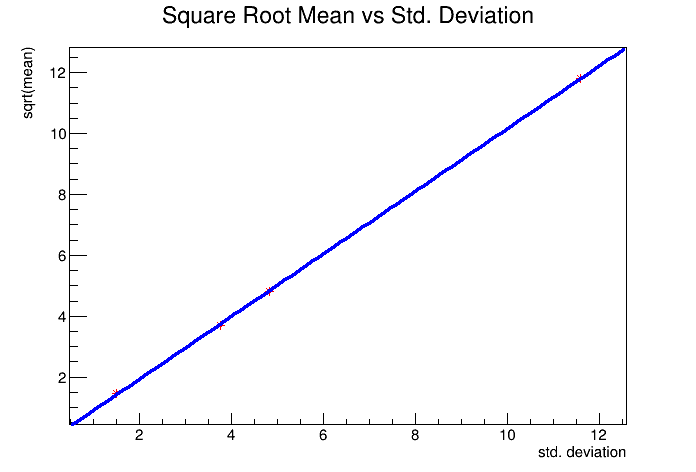

In [403]:
#plot sqrt(mu/sigma) vs mu in root
c= r.TCanvas()
gr = r.TGraphErrors(len(mu_sigma_df),mu_sigma_df["sigma"].values/1,mu_sigma_df["sqrt_mu"].values/1)
gr.SetTitle("Square Root Mean vs Std. Deviation")
gr.GetYaxis().SetTitle("sqrt(mean)")
gr.GetXaxis().SetTitle("std. deviation")

#Set point size
gr.SetLineWidth(3)
#Set point color
gr.SetMarkerColor(r.kRed)

#fit a line
f = r.TF1("ffline", "[0]*x + [1]",0,140)
f.SetParameters(0,0)
f.SetLineWidth(3)
f.SetLineColor(r.kBlue)
gr.Fit(f, "R")

gr.Draw("A*")
c.Draw()
